# Get Actions and Definitions data

In [ ]:
#NE PAS MODIFIER CETTE CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# NE PAS MODIFIER CETTE CELL
actions = pd.read_csv('/content/drive/MyDrive/DATA/actions_test_enc.csv')
definitions = pd.read_csv('/content/drive/MyDrive/DATA/definitions_test_enc.csv')

# Convert Format Date

In [ ]:
# FORMAT DATE MONTH, DAY, HOUR
actions['mytime'] = pd.to_datetime(actions['time'], format='%Y-%m-%d')
actions['time_date'] = actions['mytime'].dt.strftime('%Y-%m-%d')
actions['time_month'] = actions['mytime'].dt.strftime('%m')
actions['time_day'] = actions['mytime'].dt.strftime('%d')
actions['time_hour'] = actions['mytime'].dt.strftime('%H')
actions['time_dayofweek'] = actions['mytime'].dt.strftime('%A')
actions.head()

,time,type,platform,user_id,properties,mytime,time_date,time_month,time_day,time_hour,time_dayofweek
0,2020-08-06 20:35:55.310000,event_show,web-user,c114845c194e378d326d74afba228724,{},2020-08-06 20:35:55.310,2020-08-06,08,06,20,Thursday
1,2020-08-06 20:55:39.937000,event_show,web-user,84f103fd83c0323cdbcb75b9ac7c9b65,{},2020-08-06 20:55:39.937,2020-08-06,08,06,20,Thursday
2,2020-08-06 16:28:30.589000,event_show,web-user,a361cb75aa1e98151534d7b18af4c7fd,{},2020-08-06 16:28:30.589,2020-08-06,08,06,16,Thursday
3,2020-08-06 17:50:47.002000,event_show,web-user,2063e6ff5d24392f0d9b1a75942433f4,{},2020-08-06 17:50:47.002,2020-08-06,08,06,17,Thursday
4,2020-08-06 20:12:09.176000,event_show,web-user,9b155854a00a63d908bb87463b8bd7ef,{},2020-08-06 20:12:09.176,2020-08-06,08,06,20,Thursday


In [ ]:
pd.set_option('float_format', '{:f}'.format)
actions.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,time,type,platform,user_id,properties,mytime,time_date,time_month,time_day,time_hour,time_dayofweek
count,1385492,1385492,1194799,1380276,1385492,1385492,1385492,1385492,1385492,1385492,1385492
unique,1298711,21,4,16299,130456,1298064,99,5,31,24,7
top,2020-07-15 19:03:19,event_view_show,web-user,f00a0e6bd95f2a70b3800d2e617a48ed,{},2020-07-15 19:03:19,2020-08-05,08,05,17,Wednesday
freq,924,388414,1149861,3191,190500,924,600990,1251693,600997,176554,669590
first,NaN,NaN,NaN,NaN,NaN,2020-06-30 17:52:43.435000,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-10-20 12:23:01,NaN,NaN,NaN,NaN,NaN


# Actions by month

Text(0.5, 1.0, 'Actions by month')

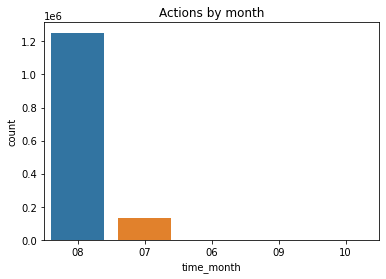

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='time_month', data=actions)
plt.title("Actions by month")

# Actions by day

In [ ]:
# GET NUMBER OF TOTAL ACTIONS BY DAY
day_stats = actions.groupby(['time_day'], as_index=False).agg({'type':'count'})
day_stats = day_stats.rename(columns={"type": "nb_actions"})
day_stats = day_stats.sort_values(by='time_day', ascending=True)
day_stats.head(5)

,time_day,nb_actions
0,01,18304
1,02,11435
2,03,58086
3,04,107488
4,05,600997


Text(0.5, 1.0, 'Count of actions by day')

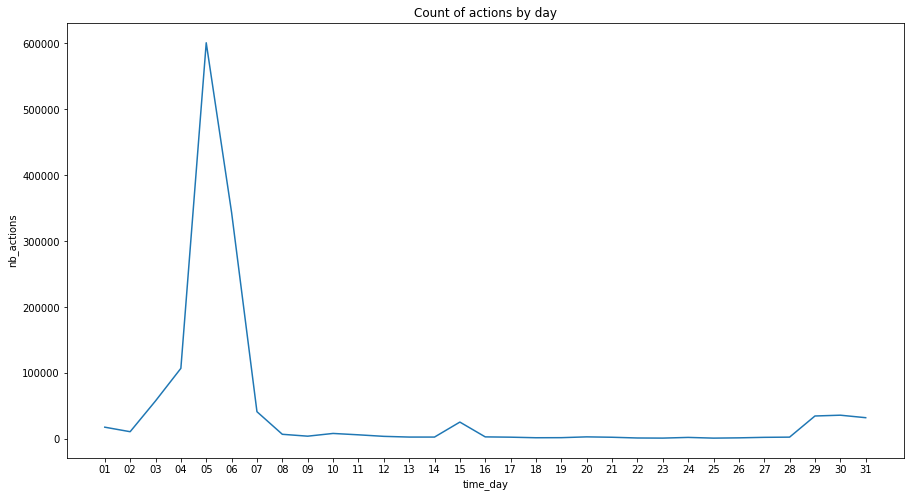

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=day_stats, x="time_day", y="nb_actions")
plt.title("Count of actions by day")

# Actions by day of week

In [ ]:
dayofweek_stats = actions.groupby(['time_dayofweek'], as_index=False).agg({'type':'count'})
dayofweek_stats = dayofweek_stats.rename(columns={"type": "nb_actions"})
dayofweek_stats = dayofweek_stats.sort_values(by='time_dayofweek', ascending=True)
dayofweek_stats

,time_dayofweek,nb_actions
0,Friday,80214
1,Monday,76020
2,Saturday,29252
3,Sunday,19479
4,Thursday,390326
5,Tuesday,120611
6,Wednesday,669590


Text(0.5, 1.0, 'Count of actions by day of week')

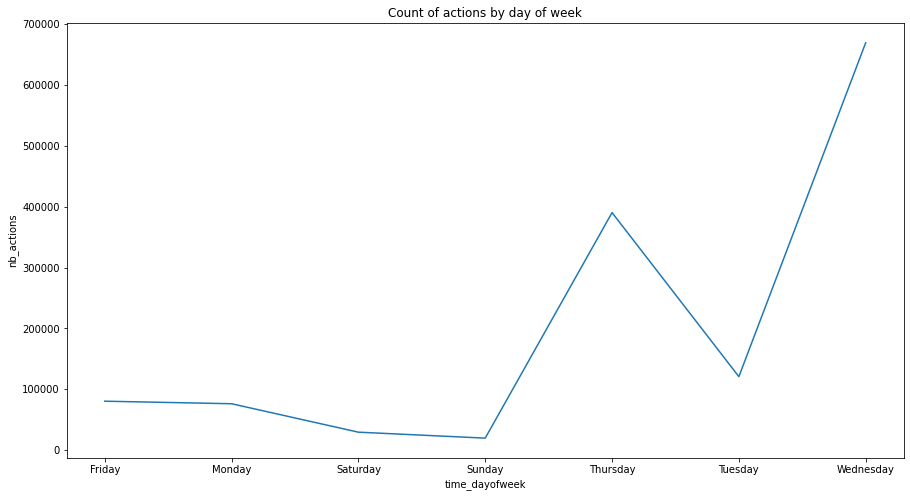

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=dayofweek_stats, x="time_dayofweek", y="nb_actions")
plt.title("Count of actions by day of week")

# Actions by hour

In [ ]:
# GET NUMBER OF TOTAL ACTION, NUMBER OF USER BY DATE
hour_stats = actions.groupby(['time_date','time_hour'], as_index=False).agg({'type':'count'})
hour_stats = hour_stats.rename(columns={"type": "nb_actions"})
hour_stats = hour_stats.sort_values(by='time_date', ascending=True)
hour_stats

,time_date,time_hour,nb_actions
0,2020-06-30,17,1
1,2020-06-30,18,1
2,2020-06-30,21,1
3,2020-07-03,12,1
4,2020-07-06,17,6
...,...,...,...
1182,2020-10-17,12,5
1184,2020-10-19,12,1
1185,2020-10-19,15,4
1183,2020-10-19,08,1


Text(0.5, 1.0, 'Count of actions by hour')

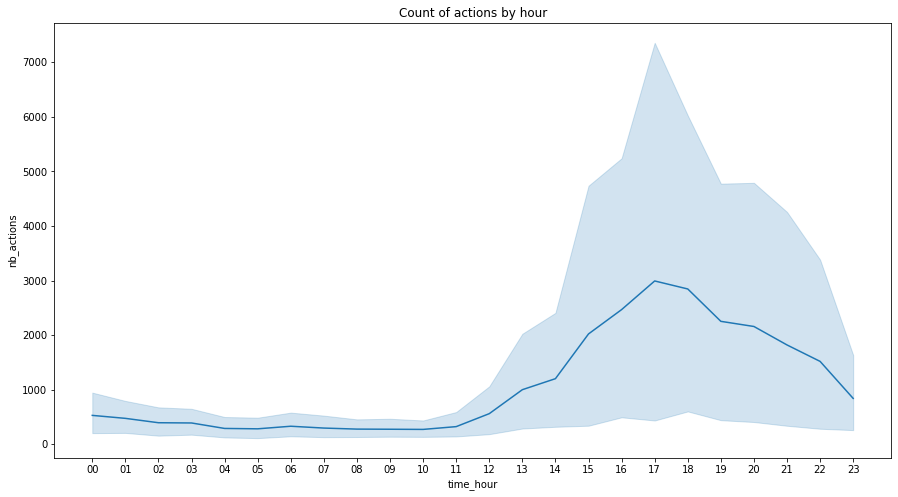

In [ ]:
# NUMBER OF TOTAL ACTION BY HOUR
hour_stats = hour_stats.sort_values(by='time_hour', ascending=True)
plt.figure(figsize = (15,8))
sns.lineplot(data=hour_stats, x="time_hour", y="nb_actions")
plt.title("Count of actions by hour")

# Users by Type

In [ ]:
# GET NUMBER OF USERS BY TYPE 
user_by_type = actions.groupby(['type','time_hour'], as_index=False).agg({'user_id':'count'})
user_by_type = user_by_type.rename(columns={"user_id":"nb_users"})
user_by_type

,type,time_hour,nb_users
0,RequestConnection,00,547
1,RequestConnection,01,403
2,RequestConnection,02,200
3,RequestConnection,03,159
4,RequestConnection,04,117
...,...,...,...
478,sponsor_open,19,87
479,sponsor_open,20,80
480,sponsor_open,21,51
481,sponsor_open,22,39


<Figure size 432x288 with 0 Axes>

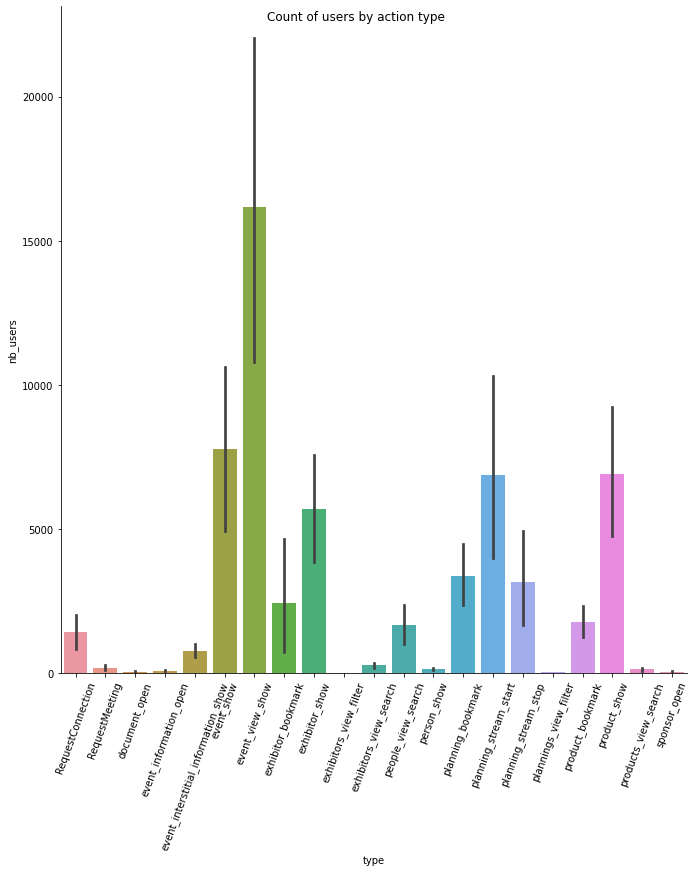

In [ ]:
plt.subplots_adjust(top=0.9)
g = sns.catplot(x='type', y='nb_users', kind='bar', data=user_by_type, height=10)
g.fig.suptitle('Count of users by action type') 
g.set_xticklabels(rotation=70)


<Figure size 432x288 with 0 Axes>

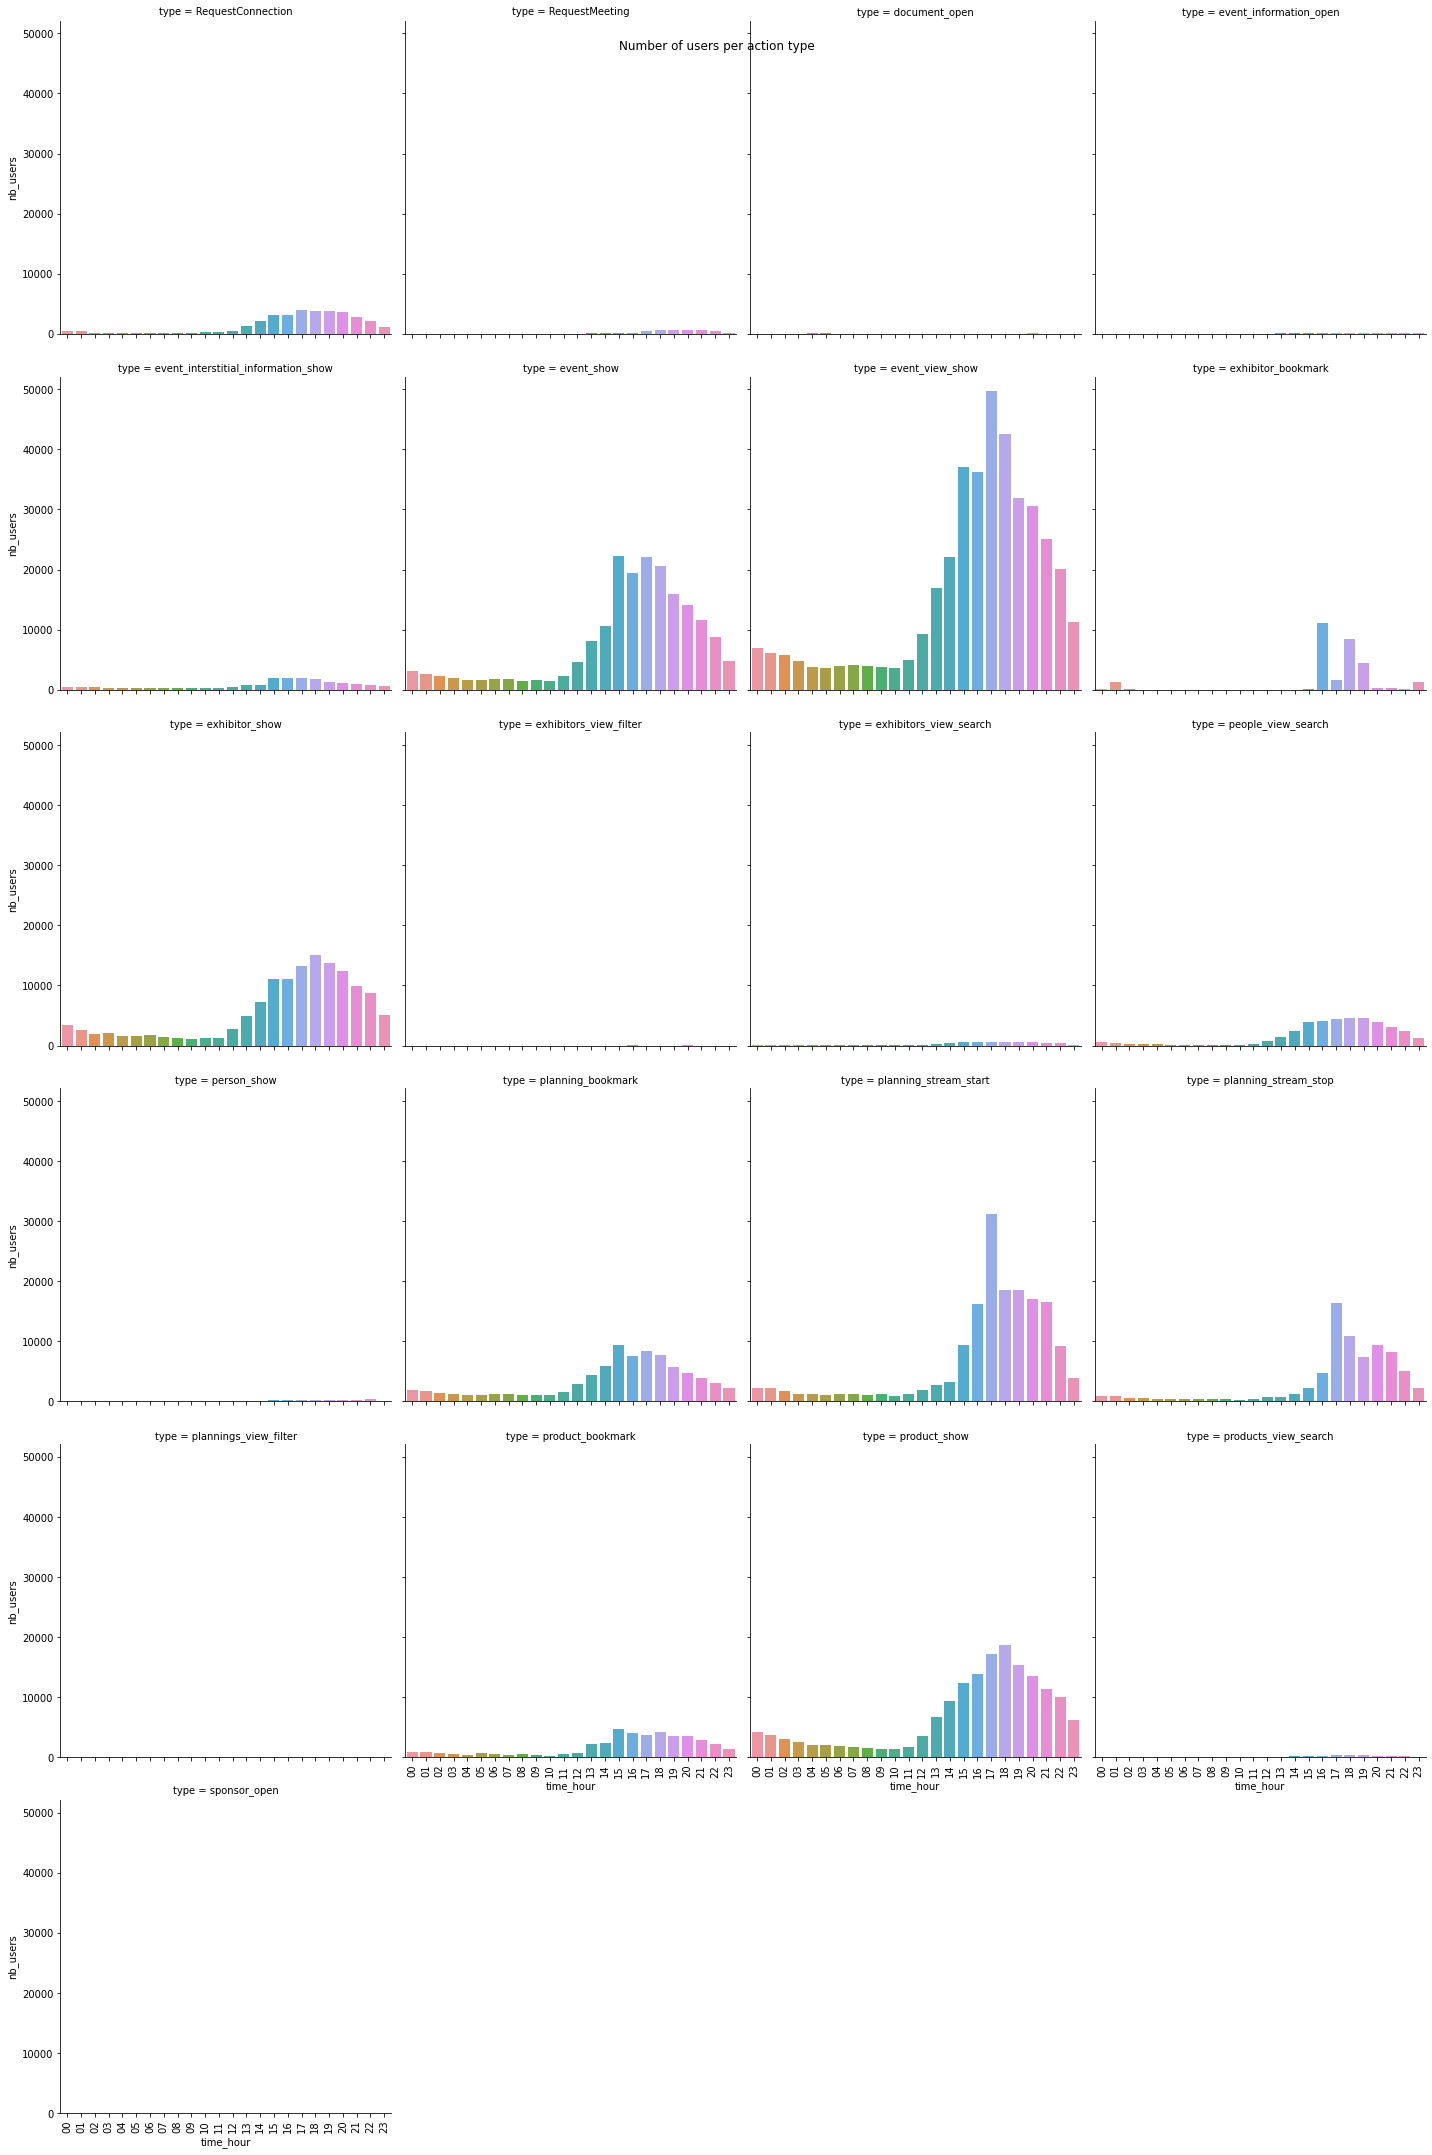

In [ ]:
# GET NUMBER OF USERS BY HOUR AND ACTION TYPE
plt.subplots_adjust(top=0.9)
g = sns.catplot(x='time_hour', y='nb_users', kind='bar', col="type", col_wrap=4, data=user_by_type)
g.fig.suptitle('Number of users per action type') 
g.set_xticklabels(rotation=90)

# Count of users by hour and type

In [ ]:
date_hour_type = actions.groupby(['time_date', 'time_hour', 'type']).agg({'user_id':'count'})
date_hour_type = date_hour_type.rename(columns={"user_id":"nb_user"})
date_hour_type

nb_user
time_date  time_hour type                      
2020-06-30 17        event_show               1
           18        event_show               1
           21        event_show               1
2020-07-03 12        event_show               0
2020-07-06 17        event_show               2
...                                         ...
2020-10-17 12        RequestConnection        5
2020-10-19 08        RequestConnection        1
           12        RequestConnection        1
           15        RequestConnection        4
2020-10-20 12        RequestConnection        2

[8625 rows x 1 columns]

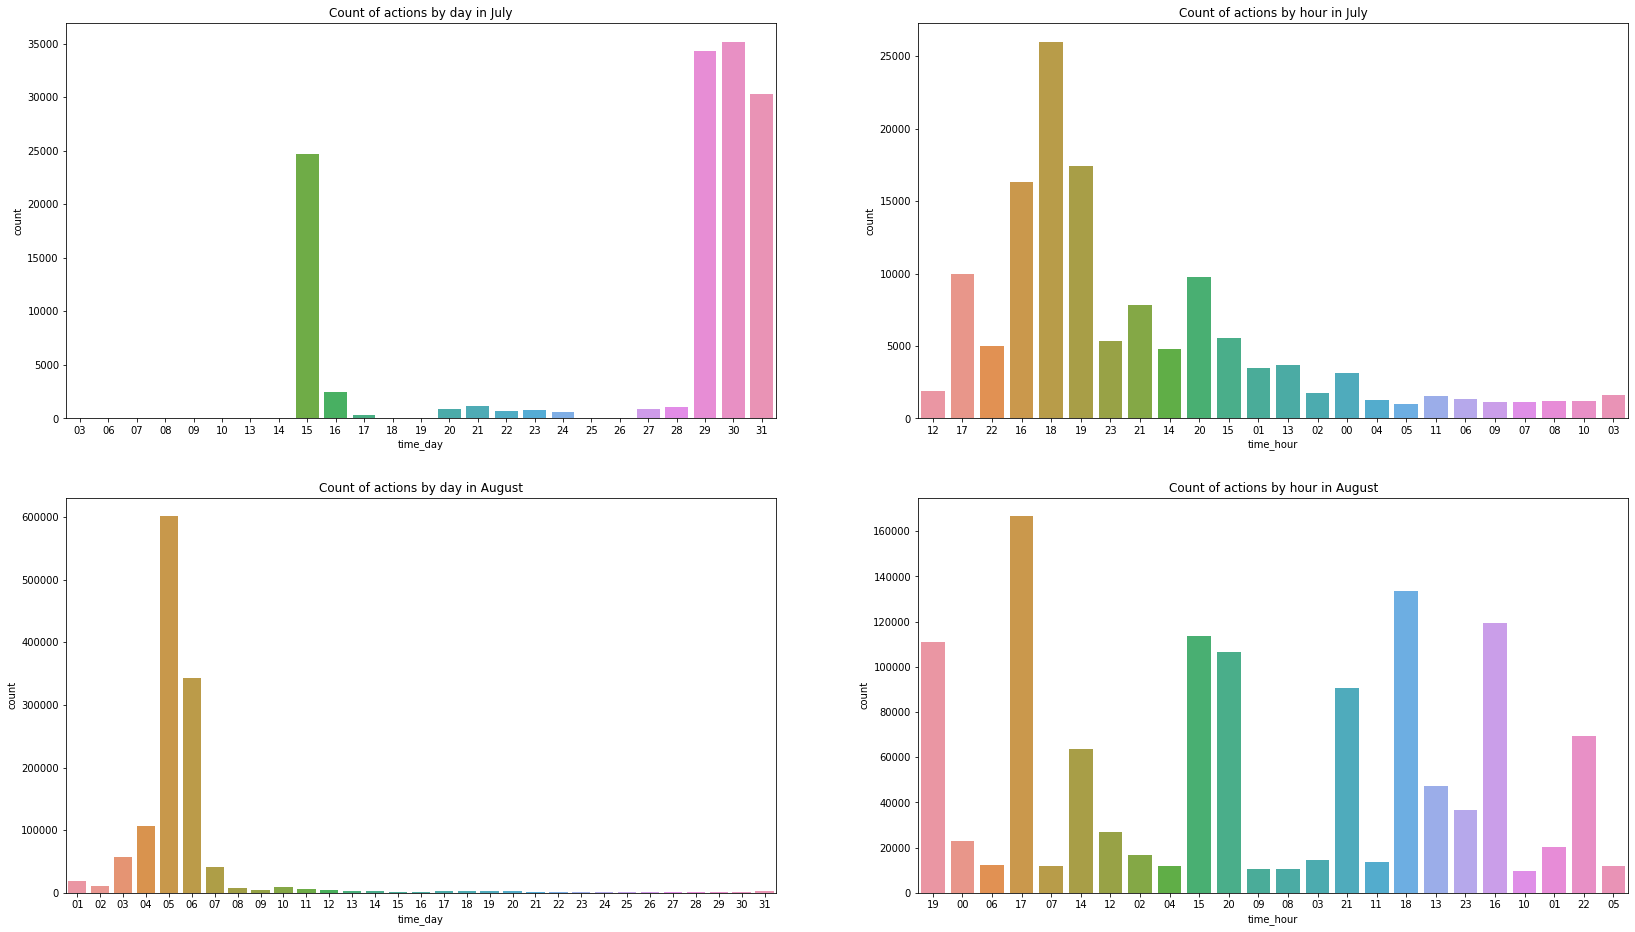

In [ ]:
actions_7 = actions.loc[actions['time_month'] == '07']
actions_8 = actions.loc[actions['time_month'] == '08']
actions_7 = actions_7.sort_values(by='time_day')
actions_8 = actions_8.sort_values(by='time_day')

fig = plt.figure(figsize=(28,16))

fig.add_subplot(221) 
ax1 = sns.countplot(x='time_day', data=actions_7)
ax1.title.set_text('Count of actions by day in July')

fig.add_subplot(222) 
ax2 = sns.countplot(x='time_hour', data=actions_7)
ax2.title.set_text('Count of actions by hour in July')

fig.add_subplot(223) 
ax3 = sns.countplot(x='time_day', data=actions_8)
ax3.title.set_text('Count of actions by day in August')

fig.add_subplot(224) 
ax4 = sns.countplot(x='time_hour', data=actions_8)
ax4.title.set_text('Count of actions by hour in August')
plt.show()